# 0. Preprocessing

An initial step of turning an example into weights (energy and interaction terms for the Ising model), so that these can be uses in the following Hamiltionan:

$$ H = \sum_{x, y} \sum_{i} a_i s_i^{(x, y)} + \sum_{x,y} \sum_{x', y'} \sum_{i,j} b_{ij} s_i^{(x, y)} s_j^{(x', y')} [ \text{if } (x, y) \text{ neighbors } (x', y')]$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# it does not need to be square or anything
n_tiles = 4
pattern_sample = np.array([
    [2, 0, 1, 0, 0],
    [0, 0, 3, 3, 3],
    [3, 3, 3, 1, 0],
    [0, 1, 0, 0, 2]
])

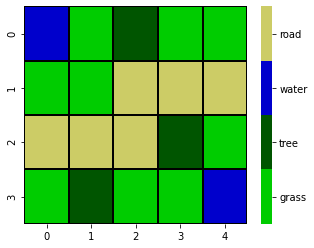

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))

tile_names = ['grass', 'tree', 'water', 'road']
tile_colors  = ['#0c0', '#050', '#00c', '#cc6']
 
sns.heatmap(pattern_sample, cmap=tile_colors, linewidth=0.1, linecolor='black', ax=ax)

colorbar = ax.collections[0].colorbar
M = pattern_sample.max().max()
colorbar.set_ticks([(i + 0.5) * (n_tiles - 1) / n_tiles for i in range(n_tiles)])
colorbar.set_ticklabels(tile_names)

plt.show()

In [4]:
counts = Counter(pattern_sample.flatten())
counts.most_common()

[(0, 9), (3, 6), (1, 3), (2, 2)]

In [5]:
total_tiles = len(pattern_sample.flatten())
total_tiles

20

In [6]:
tile_probs = np.array([counts[i] / total_tiles for i in range(n_tiles)])
tile_probs

array([0.45, 0.15, 0.1 , 0.3 ])

In [7]:
# negative log-likelihood
# higher value means something is LESS likely (so it will get a higher energy/cost function)
tile_nll = - np.log(tile_probs)
tile_nll

array([0.7985077 , 1.89711998, 2.30258509, 1.2039728 ])

In [8]:
coincidences = np.zeros((n_tiles, n_tiles))

height, width = pattern_sample.shape

# horizontal coincidences
for x in range(width - 1):
    for y in range(height):
        tile1 = pattern_sample[y, x]
        tile2 = pattern_sample[y, x + 1]
        if tile2 < tile1:
            tile1, tile2 = tile2, tile1
        coincidences[tile1, tile2] += 1
        
for x in range(width):
    for y in range(height - 1):
        tile1 = pattern_sample[y, x]
        tile2 = pattern_sample[y + 1, x]
        if tile2 < tile1:
            tile1, tile2 = tile2, tile1
        coincidences[tile1, tile2] += 1

In [9]:
# we use onlny diagonall and the upper triange (convention, nothing more)
coincidences

array([[4., 6., 4., 8.],
       [0., 0., 0., 4.],
       [0., 0., 0., 0.],
       [0., 0., 0., 5.]])

<AxesSubplot:>

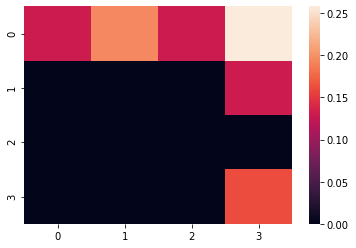

In [10]:
coincidence_prob = coincidences / coincidences.sum()
sns.heatmap(coincidence_prob)

In [11]:
# impossible combinations have inf energy
coincidence_nll = -np.log(coincidence_prob)
coincidence_nll

<ipython-input-11-47492140dfca>:2: RuntimeWarning: divide by zero encountered in log
  coincidence_nll = -np.log(coincidence_prob)


array([[2.04769284, 1.64222774, 2.04769284, 1.35454566],
       [       inf,        inf,        inf, 2.04769284],
       [       inf,        inf,        inf,        inf],
       [       inf,        inf,        inf, 1.82454929]])

<AxesSubplot:>

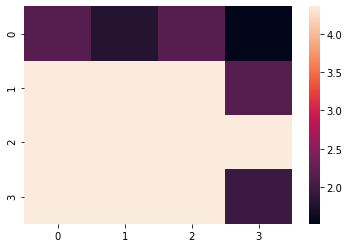

In [12]:
# if we want to avoid infinities, we can add some epsilon to probabilities
# or even better: add 0.5 to counts
# (it is arbitrary, but 0.5 apprears a lot in statistics and quantum, as the "base count")

noise = 0.5
concidence_nll_noise = -np.log((coincidences + noise) / (coincidences + noise).sum())
sns.heatmap(concidence_nll_noise)